# Taller 1 - Calentamiento

### Importante: importar librerías antes de ejecutar el código

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import RBFInterpolator
from scipy.optimize import curve_fit
from scipy.integrate import simpson  # pip install scipy
from scipy.interpolate import interp1d
from matplotlib.backends.backend_pdf import PdfPages
import warnings
warnings.filterwarnings('ignore')

## 1. Reconocimiento

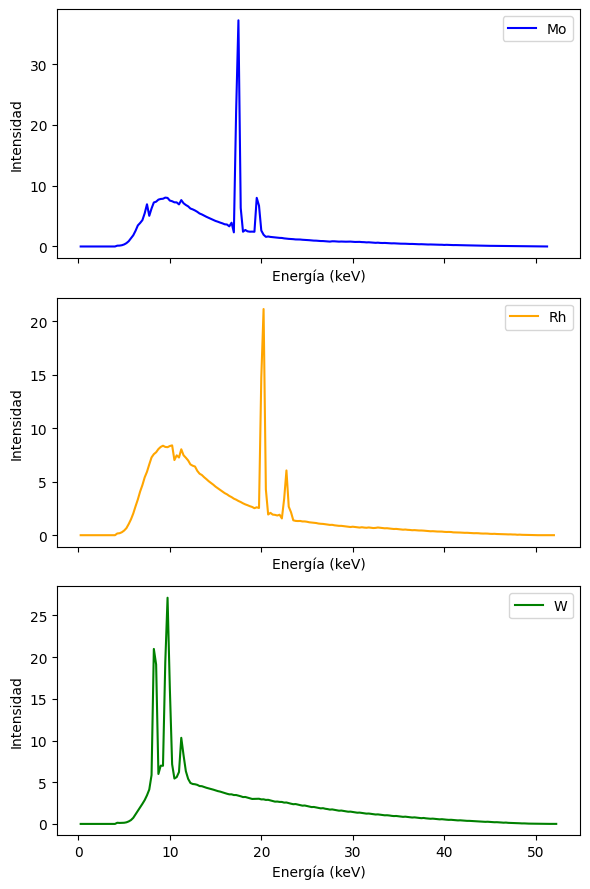

'for i in range(10, 51):\n    print(f"Mo {i}kV: {Mo_unfiltered[i][\'energy\'][:5]} {Mo_unfiltered[i][\'intensity\'][:5]}")\n    print(f"Rh {i}kV: {Rh_unfiltered[i][\'energy\'][:5]} {Rh_unfiltered[i][\'intensity\'][:5]}")\n    print(f"W {i}kV: {W_unfiltered[i][\'energy\'][:5]} {W_unfiltered[i][\'intensity\'][:5]}")\n    print("-" * 40)\n'

In [7]:
Mo_unfiltered = {}
Rh_unfiltered = {}
W_unfiltered = {}
list_of_dfs = []

for i in range(10, 51):
    Mo_unfiltered[i] = {"energy": [], "intensity": []}
    Rh_unfiltered[i] = {"energy": [], "intensity": []}
    W_unfiltered[i] = {"energy": [], "intensity": []}

    directory_Mo = "mammography_spectra/Mo_unfiltered_10kV-50kV/Mo_{}kV.dat".format(i)
    directory_Rh = "mammography_spectra/Rh_unfiltered_10kV-50kV/Rh_{}kV.dat".format(i)
    directory_W = "mammography_spectra/W_unfiltered_10kV-50kV/W_{}kV.dat".format(i)
    with open(directory_Mo, "r") as file:
        content_Mo = file.read()
        lines_Mo = content_Mo.splitlines()
    with open(directory_Rh, "r") as file:
        content_Rh = file.read()
        lines_Rh = content_Rh.splitlines()
    with open(directory_W, "r") as file:
        content_W = file.read()
        lines_W = content_W.splitlines()

    for data_Mo in lines_Mo:
        if data_Mo.startswith("#"):
            continue
        values = data_Mo.split()
        if len(values) < 2:
            continue
        energy = float(values[0])
        intensity = float(values[1])

        Mo_unfiltered[i]["energy"].append(energy)
        Mo_unfiltered[i]["intensity"].append(intensity)


        #print(f"{energy:f} {intensity:f}")
        if energy < 0 or intensity < 0:
            print("Error: Negative values found in the data.")
            break

    for data_Rh in lines_Rh:
        if data_Rh.startswith("#"):
            continue
        values = data_Rh.split()
        if len(values) < 2:
            continue
        energy = float(values[0])
        intensity = float(values[1])

        Rh_unfiltered[i]["energy"].append(energy)
        Rh_unfiltered[i]["intensity"].append(intensity)

        #print(f"{energy:f} {intensity:f}")
        if energy < 0 or intensity < 0:
            print("Error: Negative values found in the data.")
            break

    for data_W in lines_W:
        if data_W.startswith("#"):
            continue
        values = data_W.split()
        if len(values) < 2:
            continue
        energy = float(values[0])
        intensity = float(values[1])

        W_unfiltered[i]["energy"].append(energy)
        W_unfiltered[i]["intensity"].append(intensity)

        #print(f"{energy:f} {intensity:f}")
        if energy < 0 or intensity < 0:
            print("Error: Negative values found in the data.")
            break


df_Mo = pd.DataFrame(Mo_unfiltered).T.explode(['energy', 'intensity']).reset_index().rename(columns={'index': 'kV'})
df_Rh = pd.DataFrame(Rh_unfiltered).T.explode(['energy', 'intensity']).reset_index().rename(columns={'index': 'kV'})
df_W = pd.DataFrame(W_unfiltered).T.explode(['energy', 'intensity']).reset_index().rename(columns={'index': 'kV'})

# Save the DataFrames to CSV files
df_Mo.to_csv('Mo_spectra_data.csv', index=False)
df_Rh.to_csv('Rh_spectra_data.csv', index=False)
df_W.to_csv('W_spectra_data.csv', index=False)

mean_by_kV_Mo = df_Mo.groupby('kV')['intensity'].mean().reset_index()
mean = mean_by_kV_Mo['intensity'].mean()

#print("Mean intensity for Mo across all kV values:")
#print(mean_by_kV_Mo)
#print(f"Mean intensity for Mo: {mean}")

mean_by_kV_Rh = df_Rh.groupby('kV')['intensity'].mean().reset_index()
mean = mean_by_kV_Rh['intensity'].mean()
#print("Mean intensity for Rh across all kV values:")
#print(mean_by_kV_Rh)
#print(f"Mean intensity for Rh: {mean}")

mean_by_kV_W = df_W.groupby('kV')['intensity'].mean().reset_index()
mean = mean_by_kV_W['intensity'].mean()
#print("Mean intensity for W across all kV values:")
#print(mean_by_kV_W)
#print(f"Mean intensity for W: {mean}")

mean_by_kV_Mo.to_csv('mean_intensity_Mo.csv', index=False)
mean_by_kV_Rh.to_csv('mean_intensity_Rh.csv', index=False)
mean_by_kV_W.to_csv('mean_intensity_W.csv', index=False)

mean_by_energy_Mo = df_Mo.groupby('energy')['intensity'].mean().reset_index()
mean_by_energy_Rh = df_Rh.groupby('energy')['intensity'].mean().reset_index()
mean_by_energy_W = df_W.groupby('energy')['intensity'].mean().reset_index() 
mean_by_energy_Mo.to_csv('mean_intensity_by_energy_Mo.csv', index=False)
mean_by_energy_Rh.to_csv('mean_intensity_by_energy_Rh.csv', index=False)
mean_by_energy_W.to_csv('mean_intensity_by_energy_W.csv', index=False)

mean_intensity_by_energy_all = pd.concat([mean_by_energy_Mo, mean_by_energy_Rh, mean_by_energy_W], keys=['Mo', 'Rh', 'W'], names=['Material', 'Row']).reset_index(level='Material')
mean_intensity_by_energy_all.to_csv('mean_intensity_by_energy_all_materials.csv', index=False)  


fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(6, 9))  # apila 3 gráficas
# Primer subplot
axes[0].plot(mean_by_energy_Mo['energy'], mean_by_energy_Mo['intensity'], label='Mo', color='blue')
axes[0].legend(loc='upper right')
axes[0].set_ylabel('Intensidad')
axes[0].set_xlabel('Energía (keV)')

# Segundo subplot
axes[1].plot(mean_by_energy_Rh['energy'], mean_by_energy_Rh['intensity'], label='Rh', color='orange')
axes[1].legend(loc='upper right')
axes[1].set_ylabel('Intensidad')
axes[1].set_xlabel('Energía (keV)')

# Tercer subplot
axes[2].plot(mean_by_energy_W['energy'], mean_by_energy_W['intensity'], label='W', color='green')
axes[2].legend(loc='upper right')
axes[2].set_ylabel('Intensidad')
axes[2].set_xlabel('Energía (keV)')

plt.tight_layout()
# Guardar en PDF ANTES de mostrar
plt.savefig("1.pdf", bbox_inches="tight", pad_inches=0.1)
plt.show()   # opcional: mostrar en pantalla después de guardar


mean_all = pd.concat([mean_by_kV_Mo, mean_by_kV_Rh, mean_by_kV_W], keys=['Mo', 'Rh', 'W'], names=['Material', 'Row']).reset_index(level='Material')
mean_all.to_csv('mean_intensity_all_materials.csv', index=False) 

       

# Print the results for verification
"""for i in range(10, 51):
    print(f"Mo {i}kV: {Mo_unfiltered[i]['energy'][:5]} {Mo_unfiltered[i]['intensity'][:5]}")
    print(f"Rh {i}kV: {Rh_unfiltered[i]['energy'][:5]} {Rh_unfiltered[i]['intensity'][:5]}")
    print(f"W {i}kV: {W_unfiltered[i]['energy'][:5]} {W_unfiltered[i]['intensity'][:5]}")
    print("-" * 40)
"""


## 2. Comportamiento del continuo (Bremsstrahlung)

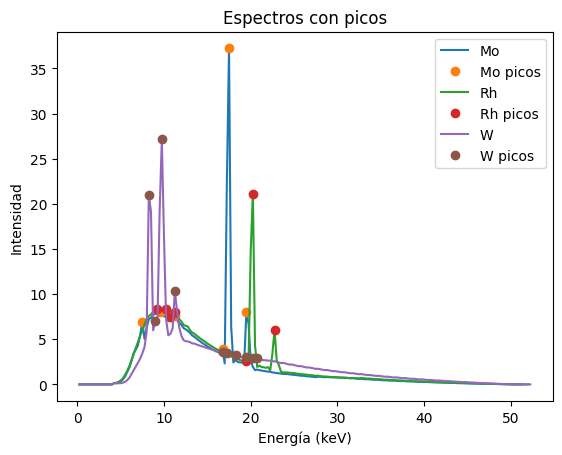

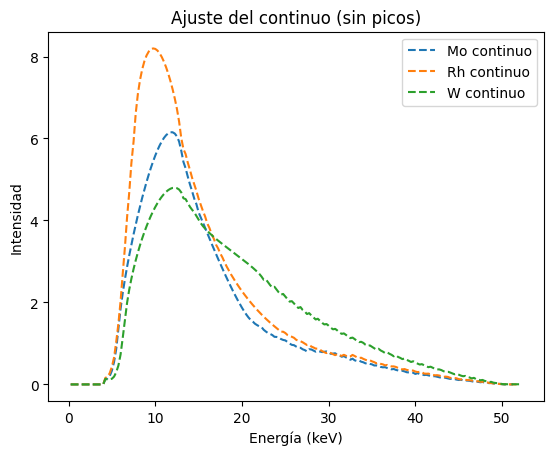

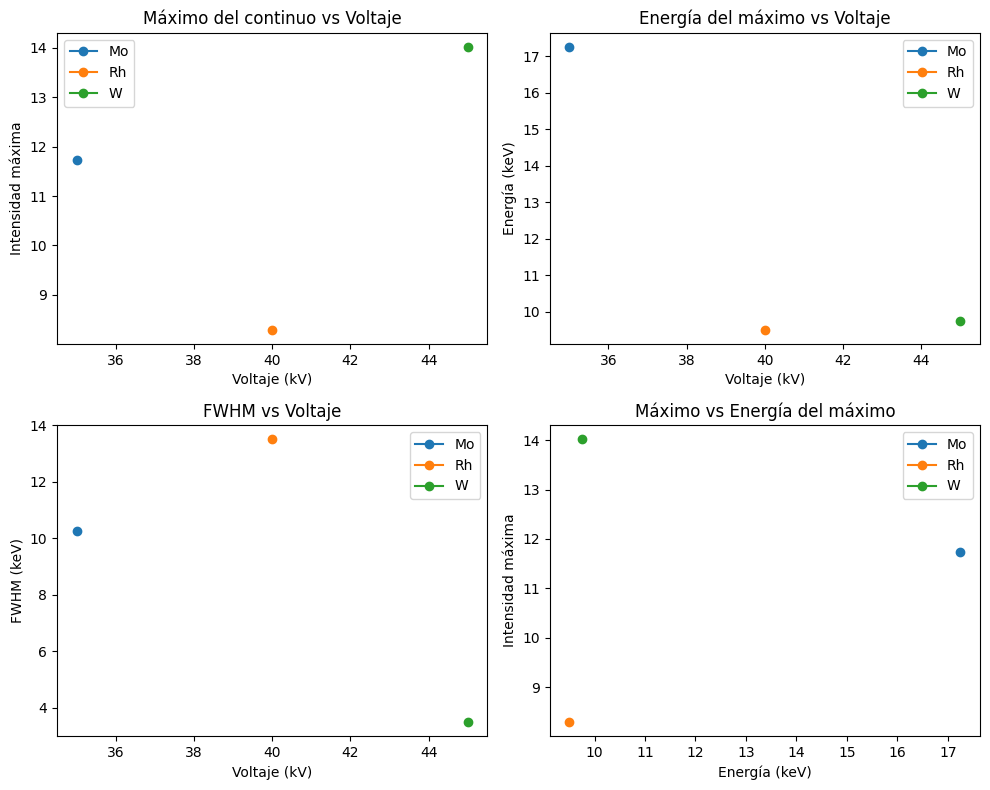

In [9]:
# ---------------------------
# FUNCIONES
# ---------------------------
def analizar_material(filename, label):
    df = pd.read_csv(filename)
    energia = df['energy'].values
    intensidad = df['intensity'].values
    peaks, _ = find_peaks(intensidad, height=np.max(intensidad) * 0.1)
    mask = np.ones(len(energia), dtype=bool)
    for p in peaks:
        start = max(0, p - 5)
        end = min(len(energia), p + 6)
        mask[start:end] = False
    energia_sin_picos = energia[mask]
    intensidad_sin_picos = intensidad[mask]
    rbf = RBFInterpolator(
        energia_sin_picos.reshape(-1, 1),
        intensidad_sin_picos,
        kernel='thin_plate_spline'
    )
    intensidad_interp = rbf(energia.reshape(-1, 1))
    return energia, intensidad, peaks, intensidad_interp

def obtener_continuo(energia, intensidad, umbral=0.05):
    intensidad = np.array(intensidad)
    energia = np.array(energia)
    mask = intensidad < (np.max(intensidad) * (1 - umbral))
    energia_filtrada = energia[mask]
    intensidad_filtrada = intensidad[mask]
    rbf = RBFInterpolator(
        energia_filtrada.reshape(-1, 1),
        intensidad_filtrada,
        neighbors=10,
        smoothing=0.5
    )
    intensidad_interp = rbf(energia.reshape(-1, 1))
    return intensidad_interp

def calcular_fwhm(energia, intensidad):
    max_val = np.max(intensidad)
    half_max = max_val / 2
    indices = np.where(intensidad >= half_max)[0]
    if len(indices) >= 2:
        fwhm = energia[indices[-1]] - energia[indices[0]]
    else:
        fwhm = np.nan
    return fwhm

# ---------------------------
# ARCHIVOS Y VOLTAJES
# ---------------------------
archivos = [
    ("mean_intensity_by_energy_Mo.csv", "Mo"),
    ("mean_intensity_by_energy_Rh.csv", "Rh"),
    ("mean_intensity_by_energy_W.csv", "W")
]

voltajes = {
    "Mo": 35,
    "Rh": 40,
    "W": 45
}

# ---------------------------
# PARTE A
# ---------------------------
plt.figure()
for filename, label in archivos:
    energia, intensidad, peaks, intensidad_interp = analizar_material(filename, label)
    plt.plot(energia, intensidad, label=f"{label}")
    plt.plot(energia[peaks], intensidad[peaks], "o", label=f"{label} picos")
plt.xlabel("Energía (keV)")
plt.ylabel("Intensidad")
plt.legend()
plt.title("Espectros con picos")
plt.savefig("2a.pdf", bbox_inches="tight", pad_inches=0.1)
plt.show()

# ---------------------------
# PARTE B
# ---------------------------
plt.figure()
for filename, label in archivos:
    energia, intensidad, peaks, intensidad_interp = analizar_material(filename, label)
    plt.plot(energia, intensidad_interp, "--", label=f"{label} continuo")
plt.xlabel("Energía (keV)")
plt.ylabel("Intensidad")
plt.legend()
plt.title("Ajuste del continuo (sin picos)")
plt.savefig("2b.pdf", bbox_inches="tight", pad_inches=0.1)
plt.show()

# ---------------------------
# PARTE C
# ---------------------------
resultados_max_val = {}
resultados_energia_max = {}
resultados_fwhm = {}

for archivo, label in archivos:
    df = pd.read_csv(archivo)
    energia = df["energy"].values
    intensidad = df["intensity"].values

    continuo = obtener_continuo(energia, intensidad)

    max_val = np.max(continuo)
    idx_max = np.argmax(continuo)
    energia_max = energia[idx_max]
    fwhm = calcular_fwhm(energia, continuo)

    resultados_max_val[label] = [max_val]
    resultados_energia_max[label] = [energia_max]
    resultados_fwhm[label] = [fwhm]

# Crear subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for label in resultados_max_val:
    axs[0, 0].plot([voltajes[label]], resultados_max_val[label], 'o-', label=label)
axs[0, 0].set_title("Máximo del continuo vs Voltaje")
axs[0, 0].set_xlabel("Voltaje (kV)")
axs[0, 0].set_ylabel("Intensidad máxima")
axs[0, 0].legend()

for label in resultados_energia_max:
    axs[0, 1].plot([voltajes[label]], resultados_energia_max[label], 'o-', label=label)
axs[0, 1].set_title("Energía del máximo vs Voltaje")
axs[0, 1].set_xlabel("Voltaje (kV)")
axs[0, 1].set_ylabel("Energía (keV)")
axs[0, 1].legend()

for label in resultados_fwhm:
    axs[1, 0].plot([voltajes[label]], resultados_fwhm[label], 'o-', label=label)
axs[1, 0].set_title("FWHM vs Voltaje")
axs[1, 0].set_xlabel("Voltaje (kV)")
axs[1, 0].set_ylabel("FWHM (keV)")
axs[1, 0].legend()

for label in resultados_max_val:
    axs[1, 1].plot(resultados_energia_max[label], resultados_max_val[label], 'o-', label=label)
axs[1, 1].set_title("Máximo vs Energía del máximo")
axs[1, 1].set_xlabel("Energía (keV)")
axs[1, 1].set_ylabel("Intensidad máxima")
axs[1, 1].legend()

plt.tight_layout()
plt.savefig("2c.pdf", bbox_inches="tight", pad_inches=0.1)
plt.show()

## 3. Picos (Rayos-X característicos)

=== PUNTO 3.A: AISLANDO PICOS ===


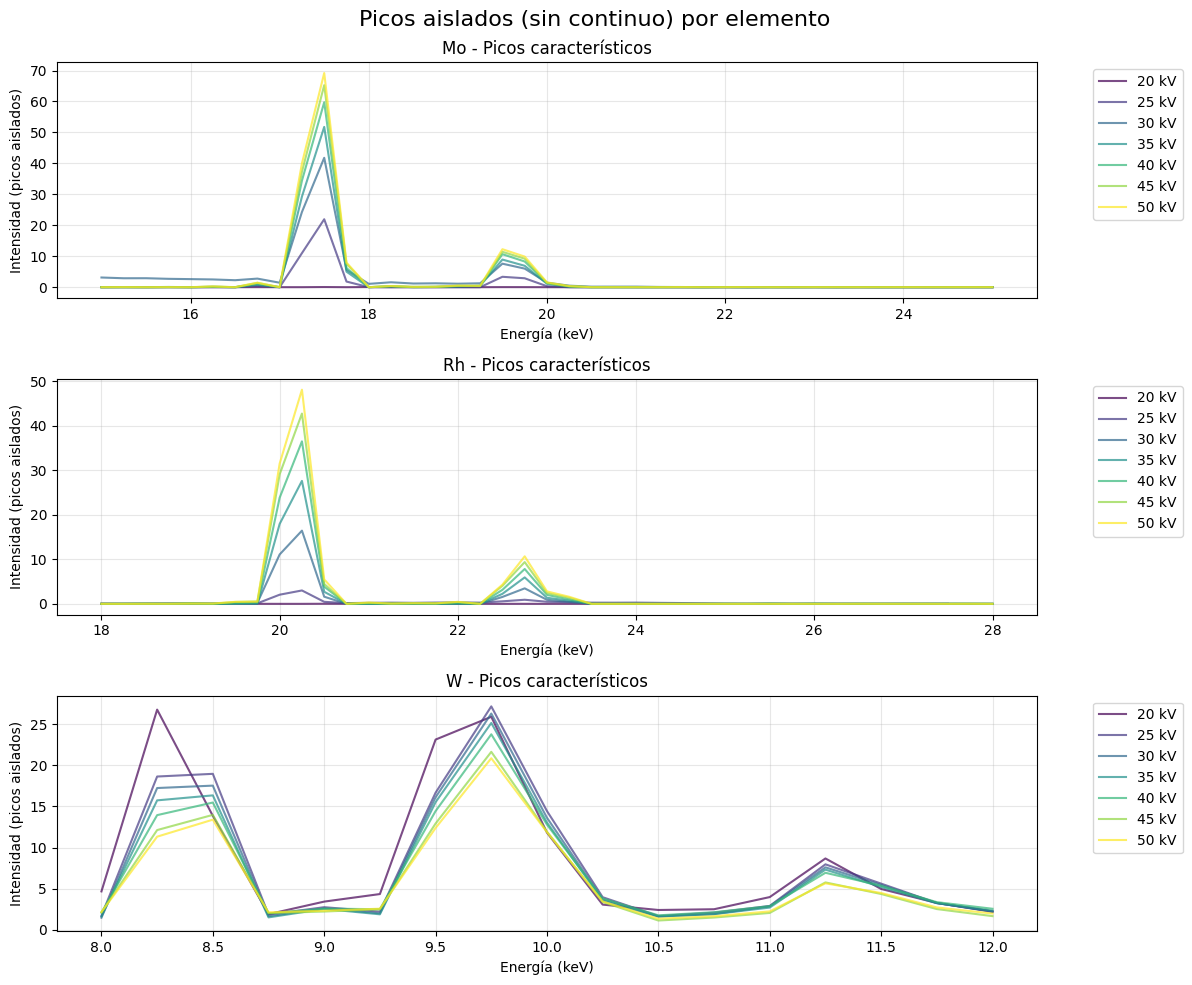


=== PUNTO 3.B: AJUSTANDO PICOS PRINCIPALES ===

Procesando Mo...
  20kV: Altura=1.40, Centro=10.60keV, FWHM=3.90keV
  25kV: Altura=25.03, Centro=17.43keV, FWHM=0.32keV
  30kV: Altura=46.14, Centro=17.42keV, FWHM=0.33keV
  35kV: Altura=59.53, Centro=17.42keV, FWHM=0.33keV
  40kV: Altura=68.38, Centro=17.42keV, FWHM=0.34keV
  45kV: Altura=73.52, Centro=17.42keV, FWHM=0.35keV
  50kV: Altura=78.26, Centro=17.42keV, FWHM=0.35keV

Procesando Rh...
  20kV: Altura=1.02, Centro=10.67keV, FWHM=3.91keV
  25kV: Altura=3.41, Centro=20.16keV, FWHM=0.34keV
  30kV: Altura=19.72, Centro=20.16keV, FWHM=0.34keV
  35kV: Altura=32.87, Centro=20.16keV, FWHM=0.34keV
  40kV: Altura=42.99, Centro=20.16keV, FWHM=0.35keV
  45kV: Altura=51.00, Centro=20.16keV, FWHM=0.35keV
  50kV: Altura=56.10, Centro=20.16keV, FWHM=0.35keV

Procesando W...
  20kV: Altura=13.10, Centro=9.34keV, FWHM=2.70keV
  25kV: Altura=11.60, Centro=9.45keV, FWHM=2.41keV
  30kV: Altura=10.90, Centro=9.47keV, FWHM=2.29keV
  35kV: Altura=10.32,

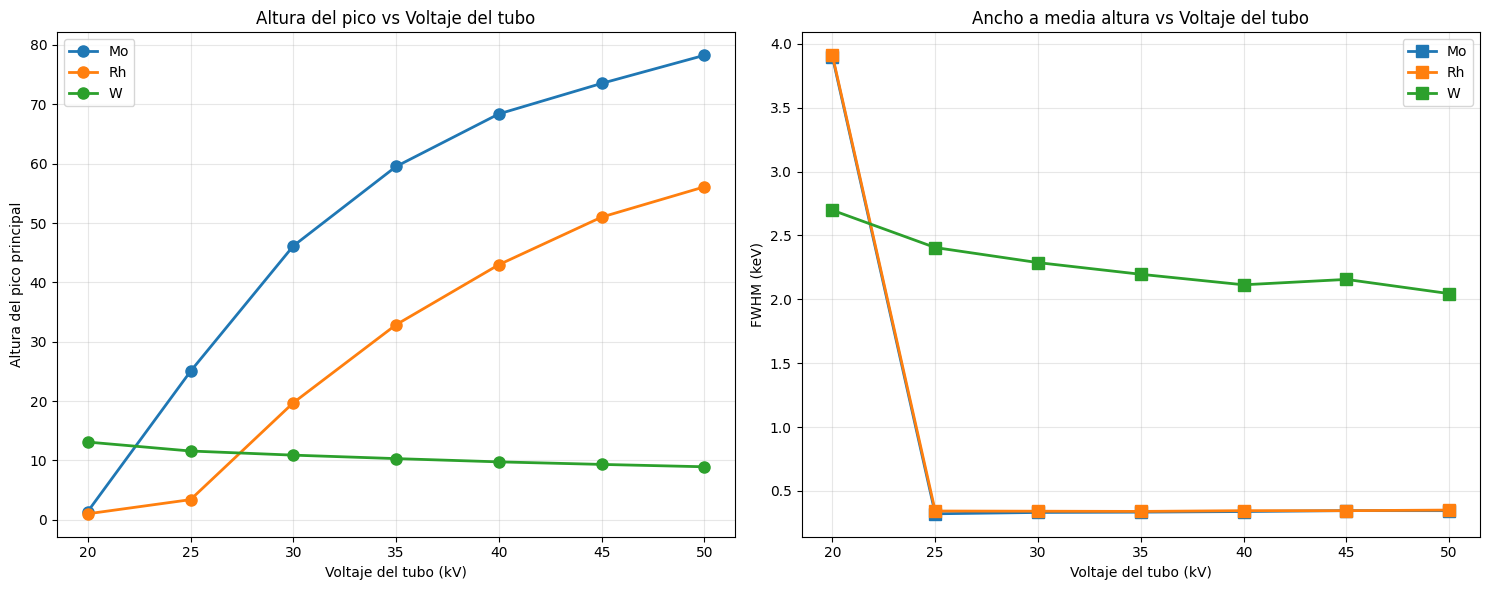


=== RESUMEN DE RESULTADOS ===

Mo:
  Voltajes analizados: [20, 25, 30, 35, 40, 45, 50]
  Alturas promedio: 50.32 ± 26.13
  FWHM promedio: 0.84 ± 1.25 keV
  Centro promedio: 16.45 ± 2.39 keV

Rh:
  Voltajes analizados: [20, 25, 30, 35, 40, 45, 50]
  Alturas promedio: 29.59 ± 20.53
  FWHM promedio: 0.85 ± 1.25 keV
  Centro promedio: 18.81 ± 3.32 keV

W:
  Voltajes analizados: [20, 25, 30, 35, 40, 45, 50]
  Alturas promedio: 10.57 ± 1.33
  FWHM promedio: 2.27 ± 0.21 keV
  Centro promedio: 9.47 ± 0.06 keV

¡Análisis del punto 3 completado!
Archivos generados:
- 3.a.pdf: Picos aislados con zoom por elemento
- 3.b.pdf: Altura y FWHM vs voltaje del tubo


In [10]:
# ===========================
# FUNCIONES AUXILIARES
# ===========================

def analizar_material(filename, label):
    """Función original del punto 2"""
    df = pd.read_csv(filename)
    energia = df['energy'].values
    intensidad = df['intensity'].values
    peaks, _ = find_peaks(intensidad, height=np.max(intensidad) * 0.1)
    mask = np.ones(len(energia), dtype=bool)
    for p in peaks:
        start = max(0, p - 5)
        end = min(len(energia), p + 6)
        mask[start:end] = False
    energia_sin_picos = energia[mask]
    intensidad_sin_picos = intensidad[mask]
    rbf = RBFInterpolator(
        energia_sin_picos.reshape(-1, 1),
        intensidad_sin_picos,
        kernel='thin_plate_spline'
    )
    intensidad_interp = rbf(energia.reshape(-1, 1))
    return energia, intensidad, peaks, intensidad_interp

def obtener_continuo_por_voltaje(material, voltaje):
    """Obtener el continuo para un material y voltaje específico"""
    # Cargar datos por voltaje desde los diccionarios originales
    if material == 'Mo':
        data = Mo_unfiltered[voltaje]
    elif material == 'Rh':
        data = Rh_unfiltered[voltaje]
    elif material == 'W':
        data = W_unfiltered[voltaje]
    
    energia = np.array(data['energy'])
    intensidad = np.array(data['intensity'])
    
    # Encontrar picos
    peaks, _ = find_peaks(intensidad, height=np.max(intensidad) * 0.1, distance=5)
    
    # Crear máscara excluyendo regiones de picos
    mask = np.ones(len(energia), dtype=bool)
    for p in peaks:
        start = max(0, p - 8)  # Ampliamos un poco la exclusión
        end = min(len(energia), p + 9)
        mask[start:end] = False
    
    if np.sum(mask) < 10:  # Si quedan muy pocos puntos
        return energia, intensidad, np.zeros_like(intensidad)
    
    energia_sin_picos = energia[mask]
    intensidad_sin_picos = intensidad[mask]
    
    try:
        rbf = RBFInterpolator(
            energia_sin_picos.reshape(-1, 1),
            intensidad_sin_picos,
            kernel='thin_plate_spline',
            smoothing=0.1
        )
        continuo = rbf(energia.reshape(-1, 1))
        return energia, intensidad, continuo
    except:
        return energia, intensidad, np.zeros_like(intensidad)

def gaussiana(x, amplitud, centro, sigma, offset=0):
    """Función Gaussiana para ajuste"""
    return amplitud * np.exp(-(x - centro)**2 / (2 * sigma**2)) + offset

def encontrar_picos_principales(energia, intensidad_picos, min_height=0.05):
    """Encontrar los picos principales en el espectro sin continuo"""
    max_int = np.max(intensidad_picos)
    if max_int <= 0:
        return []
    
    peaks, properties = find_peaks(
        intensidad_picos, 
        height=max_int * min_height,
        distance=10,
        prominence=max_int * 0.02
    )
    
    if len(peaks) == 0:
        return []
    
    # Ordenar por altura y tomar los más altos
    alturas = intensidad_picos[peaks]
    indices_ordenados = np.argsort(alturas)[::-1]
    peaks_ordenados = peaks[indices_ordenados]
    
    return peaks_ordenados[:3]  # Máximo 3 picos principales

def ajustar_pico_gaussiano(energia, intensidad, peak_idx, ventana=15):
    """Ajustar una Gaussiana a un pico específico"""
    start = max(0, peak_idx - ventana)
    end = min(len(energia), peak_idx + ventana + 1)
    
    x_fit = energia[start:end]
    y_fit = intensidad[start:end]
    
    if len(x_fit) < 5 or np.max(y_fit) <= 0:
        return None, None, None, None
    
    # Parámetros iniciales
    centro_inicial = energia[peak_idx]
    amplitud_inicial = intensidad[peak_idx]
    sigma_inicial = 1.0  # keV
    offset_inicial = np.min(y_fit)
    
    try:
        # Ajuste con restricciones
        bounds = (
            [0, centro_inicial - 2, 0.1, -amplitud_inicial*0.1],  # límites inferiores
            [amplitud_inicial * 3, centro_inicial + 2, 5.0, amplitud_inicial*0.1]  # límites superiores
        )
        
        popt, pcov = curve_fit(
            gaussiana, x_fit, y_fit,
            p0=[amplitud_inicial, centro_inicial, sigma_inicial, offset_inicial],
            bounds=bounds,
            maxfev=2000
        )
        
        amplitud, centro, sigma, offset = popt
        fwhm = 2.355 * sigma  # FWHM = 2*sqrt(2*ln(2))*sigma
        
        return amplitud, centro, fwhm, popt
        
    except Exception as e:
        return None, None, None, None

# ===========================
# DATOS NECESARIOS (del código original)
# ===========================

# Recrear los diccionarios como en el código original
Mo_unfiltered = {}
Rh_unfiltered = {}
W_unfiltered = {}

# Cargar los datos (simulando la estructura original)
# Si no tienes los archivos .dat, usamos los CSV existentes
try:
    df_Mo = pd.read_csv('Mo_spectra_data.csv')
    df_Rh = pd.read_csv('Rh_spectra_data.csv') 
    df_W = pd.read_csv('W_spectra_data.csv')
    
    # Reconstruir los diccionarios por voltaje
    for kv in range(10, 51):
        Mo_data = df_Mo[df_Mo['kV'] == kv]
        Rh_data = df_Rh[df_Rh['kV'] == kv]
        W_data = df_W[df_W['kV'] == kv]
        
        Mo_unfiltered[kv] = {
            'energy': Mo_data['energy'].astype(float).tolist(),
            'intensity': Mo_data['intensity'].astype(float).tolist()
        }
        Rh_unfiltered[kv] = {
            'energy': Rh_data['energy'].astype(float).tolist(),
            'intensity': Rh_data['intensity'].astype(float).tolist()
        }
        W_unfiltered[kv] = {
            'energy': W_data['energy'].astype(float).tolist(),
            'intensity': W_data['intensity'].astype(float).tolist()
        }
except:
    print("Error: No se pudieron cargar los archivos CSV. Asegúrate de que existen los archivos generados en pasos anteriores.")

# ===========================
# PUNTO 3.A: AISLAR PICOS
# ===========================

print("=== PUNTO 3.A: AISLANDO PICOS ===")

materiales = ['Mo', 'Rh', 'W']
voltajes = range(20, 51, 5)  # 20, 25, 30, 35, 40, 45, 50 kV

# Rangos de energía para zoom en cada material (ajustar según tus datos)
rangos_zoom = {
    'Mo': (15, 25),  # keV
    'Rh': (18, 28),  # keV  
    'W': (8, 12)     # keV (líneas L) y (58, 70) para líneas K
}

fig, axes = plt.subplots(3, 1, figsize=(12, 10))
fig.suptitle('Picos aislados (sin continuo) por elemento', fontsize=16)

for i, material in enumerate(materiales):
    ax = axes[i]
    colores = plt.cm.viridis(np.linspace(0, 1, len(voltajes)))
    
    for j, voltaje in enumerate(voltajes):
        try:
            energia, intensidad, continuo = obtener_continuo_por_voltaje(material, voltaje)
            
            # Restar el continuo para aislar los picos
            picos_aislados = intensidad - continuo
            picos_aislados = np.maximum(picos_aislados, 0)  # No valores negativos
            
            # Aplicar zoom
            x_min, x_max = rangos_zoom[material]
            mask_zoom = (energia >= x_min) & (energia <= x_max)
            
            if np.sum(mask_zoom) > 0:
                ax.plot(energia[mask_zoom], picos_aislados[mask_zoom], 
                       color=colores[j], alpha=0.7, linewidth=1.5,
                       label=f'{voltaje} kV')
        except Exception as e:
            print(f"Error procesando {material} {voltaje}kV: {e}")
            continue
    
    ax.set_title(f'{material} - Picos característicos')
    ax.set_xlabel('Energía (keV)')
    ax.set_ylabel('Intensidad (picos aislados)')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('3.a.pdf', bbox_inches='tight', dpi=300)
plt.show()

# ===========================
# PUNTO 3.B: AJUSTAR PICOS PRINCIPALES
# ===========================

print("\n=== PUNTO 3.B: AJUSTANDO PICOS PRINCIPALES ===")

# Almacenar resultados
resultados_ajuste = {
    'Mo': {'voltajes': [], 'alturas': [], 'fwhm': [], 'centros': []},
    'Rh': {'voltajes': [], 'alturas': [], 'fwhm': [], 'centros': []},
    'W': {'voltajes': [], 'alturas': [], 'fwhm': [], 'centros': []}
}

# Procesar cada material y voltaje
for material in materiales:
    print(f"\nProcesando {material}...")
    
    for voltaje in voltajes:
        try:
            energia, intensidad, continuo = obtener_continuo_por_voltaje(material, voltaje)
            
            # Aislar picos
            picos_aislados = intensidad - continuo
            picos_aislados = np.maximum(picos_aislados, 0)
            
            # Encontrar picos principales
            picos_indices = encontrar_picos_principales(energia, picos_aislados)
            
            if len(picos_indices) == 0:
                print(f"  {voltaje}kV: No se encontraron picos significativos")
                continue
            
            # Tomar el pico más alto
            pico_principal = picos_indices[0]
            
            # Ajustar Gaussiana
            altura, centro, fwhm, params = ajustar_pico_gaussiano(
                energia, picos_aislados, pico_principal
            )
            
            if altura is not None:
                resultados_ajuste[material]['voltajes'].append(voltaje)
                resultados_ajuste[material]['alturas'].append(altura)
                resultados_ajuste[material]['fwhm'].append(fwhm)
                resultados_ajuste[material]['centros'].append(centro)
                print(f"  {voltaje}kV: Altura={altura:.2f}, Centro={centro:.2f}keV, FWHM={fwhm:.2f}keV")
            else:
                print(f"  {voltaje}kV: Ajuste fallido")
                
        except Exception as e:
            print(f"  {voltaje}kV: Error - {e}")

# Crear gráficos de resultados
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Altura vs Voltaje
ax1 = axes[0]
for material in materiales:
    if len(resultados_ajuste[material]['voltajes']) > 0:
        ax1.plot(resultados_ajuste[material]['voltajes'], 
                resultados_ajuste[material]['alturas'],
                'o-', label=f'{material}', linewidth=2, markersize=8)

ax1.set_xlabel('Voltaje del tubo (kV)')
ax1.set_ylabel('Altura del pico principal')
ax1.set_title('Altura del pico vs Voltaje del tubo')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Gráfico 2: FWHM vs Voltaje  
ax2 = axes[1]
for material in materiales:
    if len(resultados_ajuste[material]['voltajes']) > 0:
        ax2.plot(resultados_ajuste[material]['voltajes'],
                resultados_ajuste[material]['fwhm'], 
                's-', label=f'{material}', linewidth=2, markersize=8)

ax2.set_xlabel('Voltaje del tubo (kV)')
ax2.set_ylabel('FWHM (keV)')
ax2.set_title('Ancho a media altura vs Voltaje del tubo')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('3.b.pdf', bbox_inches='tight', dpi=300)
plt.show()

# Imprimir resumen de resultados
print("\n=== RESUMEN DE RESULTADOS ===")
for material in materiales:
    data = resultados_ajuste[material]
    if len(data['voltajes']) > 0:
        print(f"\n{material}:")
        print(f"  Voltajes analizados: {data['voltajes']}")
        print(f"  Alturas promedio: {np.mean(data['alturas']):.2f} ± {np.std(data['alturas']):.2f}")
        print(f"  FWHM promedio: {np.mean(data['fwhm']):.2f} ± {np.std(data['fwhm']):.2f} keV")
        print(f"  Centro promedio: {np.mean(data['centros']):.2f} ± {np.std(data['centros']):.2f} keV")

print("\n¡Análisis del punto 3 completado!")
print("Archivos generados:")
print("- 3.a.pdf: Picos aislados con zoom por elemento")  
print("- 3.b.pdf: Altura y FWHM vs voltaje del tubo")

In [11]:
import numpy as np


def _prepare_xy(x, y):
    """Asegura arrays numpy, elimina NaN y ordena por x ascendente."""
    x = np.asarray(x)
    y = np.asarray(y)
    mask = ~np.isnan(x) & ~np.isnan(y)
    x = x[mask]; y = y[mask]
    order = np.argsort(x)
    return x[order], y[order]

def area_total(x, y, method='trapz'):
    """
    Calcula área total bajo la curva (integral sobre todo el dominio de x).
    method: 'trapz' o 'simpson'
    """
    x, y = _prepare_xy(x, y)
    if method == 'simpson':
        # simpson requiere al menos 3 puntos
        if len(x) < 3:
            return np.trapz(y, x)
        return simpson(y, x)
    else:
        return np.trapz(y, x)

def area_interval(x, y, xmin, xmax, method='trapz', ngrid=2000):
    """
    Calcula área entre xmin y xmax.
    - interpola sobre una malla fina dentro de [xmin,xmax] y aplica integración.
    - ngrid: número de puntos en la malla fina (mayor -> más preciso).
    """
    x, y = _prepare_xy(x, y)

    # recortar intervalo factible
    x_min_data, x_max_data = x.min(), x.max()
    a = max(xmin, x_min_data)
    b = min(xmax, x_max_data)
    if a >= b:
        return 0.0  # no hay solapamiento entre dominio pedido y datos

    # interpolador lineal (puedes usar 'cubic' si tus datos son suaves)
    f = interp1d(x, y, kind='linear', bounds_error=False, fill_value=0.0)
    xs = np.linspace(a, b, ngrid)
    ys = f(xs)

    if method == 'simpson':
        return simpson(ys, xs)
    else:
        return np.trapz(ys, xs)

def percent_interval(x, y, xmin, xmax, method='trapz', ngrid=2000, baseline=None):
    """
    % del área en [xmin,xmax] respecto al área total.
    baseline: si se pasa una función o valor, se resta antes de integrar.
              - si baseline es 'savgol' o similar implementa por fuera y pasa y-baseline.
    Retorna (area_interval, area_total, percent)
    """
    # si baseline es un array del mismo tamaño, réstalo primero
    x0, y0 = _prepare_xy(x, y)
    if baseline is not None:
        # baseline puede ser un array o un callable que acepte x
        if callable(baseline):
            base = baseline(x0)
        else:
            base = np.asarray(baseline)
            if base.shape != y0.shape:
                raise ValueError("baseline array debe tener misma forma que y")
        y0 = y0 - base

    a_tot = area_total(x0, y0, method=method)
    a_int = area_interval(x0, y0, xmin, xmax, method=method, ngrid=ngrid)

    # si deseas porcentaje del valor absoluto del total:
    if a_tot == 0:
        pct = 0.0
    else:
        pct = 100.0 * (a_int / a_tot)
    return a_int, a_tot, pct




# ejemplo: integrar todo y luego entre 18 y 22 keV
xmin, xmax = 18.0, 22.0

for name, df in [('Mo', mean_by_energy_Mo),
                 ('Rh', mean_by_energy_Rh),
                 ('W',  mean_by_energy_W)]:
    x = df['energy'].values
    y = df['intensity'].values

    a_tot = area_total(x, y, method='trapz')
    a_18_22, a_tot2, pct = percent_interval(x, y, xmin, xmax, method='trapz', ngrid=2000)

    print(f"{name}: Area total = {a_tot:.4e}; Area [{xmin},{xmax}] = {a_18_22:.4e} -> {pct:.2f}%")



TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''